# Classification task example #

In [1]:
%matplotlib inline

import os
import array
import struct
import warnings

import numpy as np
import matplotlib.pyplot as plt

from simple_neural_network import ANN, Evolution, confusion_matrix

warnings.filterwarnings("ignore")

In [2]:
class MnistLoader:
    """Load the MNIST dataset.
    
    Required four files (for training and testing) must be found
    from the local file system (no external downloading).
    
    Parameters
    ----------
    folder : str
        Location for the required files.
    """
    train_file_names = ("train-images.idx3-ubyte", "train-labels.idx1-ubyte")
    test_file_names = ("t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte")
    
    def __init__(self, folder):
        self.folder = folder
        
    @staticmethod
    def _process_labels(label_file):
        with open(label_file, "rb") as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError(f"Magic number mismatch, {magic} != expected 2049")
            labels_raw = array.array("B", file.read())
            
        return np.array(labels_raw, dtype=np.uint8)
        
    @staticmethod
    def _process_images(image_file):
        with open(image_file, "rb") as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError(f"Magic number mismatch, {magic} != expected 2051")
            images_raw = array.array("B", file.read())
        
        return np.array(images_raw, dtype=np.uint8).reshape(size, rows*cols)
        
    def _read_raw(self, image_file, label_file):
        labels = self._process_labels(label_file)
        images = self._process_images(image_file)
        return images, labels
        
    def load(self):
        x_train, y_train = self._read_raw(
            os.path.join(self.folder, self.train_file_names[0]),
            os.path.join(self.folder, self.train_file_names[1]),
        )
        x_test, y_test = self._read_raw(
            os.path.join(self.folder, self.test_file_names[0]),
            os.path.join(self.folder, self.test_file_names[1]),
        )
        
        return (x_train, y_train), (x_test, y_test)

In [3]:
mnist_loader = MnistLoader(".")

(x_train, y_train), (x_test, y_test) = mnist_loader.load()

In [4]:
def show_img(i, train=True):
    if train:
        assert i >= 0 and i < x_train.shape[0], f"{i} is out of bounds"
        img = x_train[i].reshape((28, 28))
        title = f"train image: {y_train[i]}"
    else:
        assert i >= 0 and i < x_test.shape[0], f"{i} is out of bounds"
        img = x_test[i].reshape((28, 28))
        title = f"test image: {y_test[i]}"
        
    plt.imshow(img, cmap="gray")
    plt.title(title)

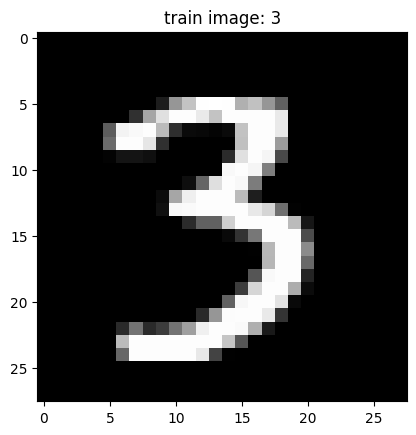

In [5]:
show_img(10000, train=True)

## Selection of hyperparameters - Evolution algorithm ##

In [6]:
evo = Evolution(generations=5, population_size=10)

In [7]:
evo.fit(
    x_train,
    y_train.reshape(-1, 1),
    "classification",
    epochs = 10,
    batch_size = 5000,
)

####################
Evolution generation: 1/5
Hyperset 1/10: Fitness value (cost) for test data: 19.47
Hyperset 2/10: Fitness value (cost) for test data: 14.52
Hyperset 3/10: Fitness value (cost) for test data: 19.10
Hyperset 4/10: Fitness value (cost) for test data: 7.27
Hyperset 5/10: Fitness value (cost) for test data: 9.76
Hyperset 6/10: Fitness value (cost) for test data: 18.38
Hyperset 7/10: Fitness value (cost) for test data: 14.56
Hyperset 8/10: Fitness value (cost) for test data: 18.57
Hyperset 9/10: Fitness value (cost) for test data: 18.58
Hyperset 10/10: Fitness value (cost) for test data: 18.19
Best hyperset so far: {'hidden_nodes': (15, 30), 'optimizer': 'adam', 'learning_rate': 10.0, 'lambda_': 10.0, 'activation1': 'leaky_relu', 'activation2': 'relu', 'fitness': 7.270412430479533}
Elapsed time: 1 m. 26 s.
####################
Evolution generation: 2/5
Hyperset 1/10: Fitness value (cost) for test data: 18.48
Hyperset 2/10: Fitness value (cost) for test data: 18.58
Hypers

[{'hidden_nodes': (15, 30),
  'optimizer': 'adam',
  'learning_rate': 5.0,
  'lambda_': 100.0,
  'activation1': 'leaky_relu',
  'activation2': 'relu',
  'fitness': 5.96139280504925},
 {'hidden_nodes': (150, 15),
  'optimizer': 'adam',
  'learning_rate': 25.0,
  'lambda_': 50.0,
  'activation1': 'leaky_relu',
  'activation2': 'tanh',
  'fitness': 9.07333655838087},
 {'lambda_': 5.0,
  'optimizer': 'sgd',
  'learning_rate': 25.0,
  'activation1': 'leaky_relu',
  'hidden_nodes': (15, 30),
  'activation2': 'relu',
  'fitness': 17.031070640152294},
 {'lambda_': 100.0,
  'optimizer': 'sgd',
  'learning_rate': 25.0,
  'activation1': 'leaky_relu',
  'hidden_nodes': (150, 35),
  'activation2': 'elu',
  'fitness': 18.222658425834208},
 {'lambda_': 10.0,
  'optimizer': 'adam',
  'learning_rate': 0.001,
  'activation1': 'tanh',
  'hidden_nodes': (40, 150),
  'activation2': 'leaky_relu',
  'fitness': 18.233020058753183},
 {'hidden_nodes': (150, 35),
  'optimizer': 'sgd',
  'learning_rate': 0.1,
  '

## Fit ANN models ##

In [53]:
ann = ANN(
    hidden_nodes = (15, 30),
    optimizer = "adam",
    learning_rate = 5.0,
    lambda_ = 100.0,
    early_stop_threshold=50,
    activation1="leaky_relu",
    activation2="relu",
    verbose_level=None # suppress logs for now
)

In [54]:
ann.fit(x_train, y_train.reshape(-1, 1), epochs=100, batch_size=5000)

In [55]:
ann.get_fit_results()

{'epochs': 100,
 'train_data': {'smallest_cost': 0.6505,
  'smallest_cost_epoch': 19,
  'best_acc': 0.8596,
  'best_acc_epoch': 19},
 'weights_last_saved_epoch': 18,
 'validation_data': {'smallest_cost': 0.717,
  'smallest_cost_epoch': 18,
  'best_acc': 0.859,
  'best_acc_epoch': 19}}

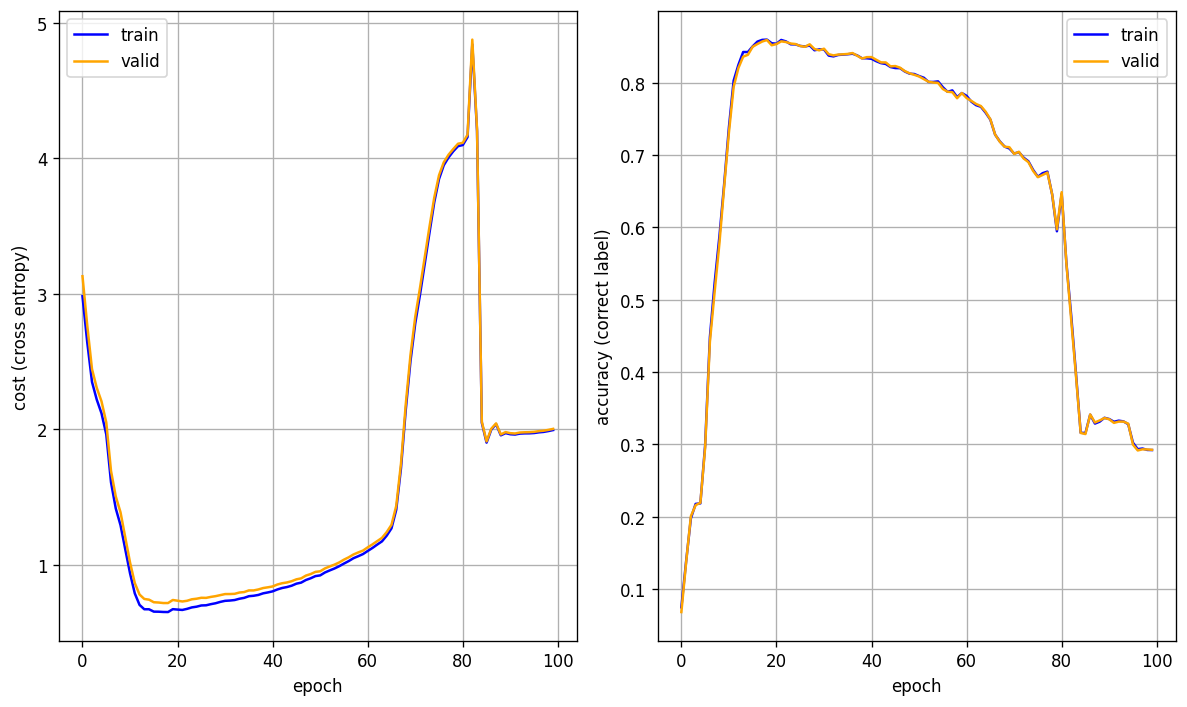

In [56]:
ann.plot_fit_results()

### Let's try again with bit modified hyperparameters ###

In [57]:
ann2 = ANN(
    hidden_nodes = (15, 30),
    optimizer = "adam",
    learning_rate = 10.0,
    lambda_ = 10.0,
    early_stop_threshold=50,
    activation1="leaky_relu",
    activation2="relu",
    verbose_level=None
)

In [58]:
ann2.fit(x_train, y_train.reshape(-1, 1), epochs=100, batch_size=5000)

In [59]:
ann2.get_fit_results()

{'epochs': 100,
 'train_data': {'smallest_cost': 0.439,
  'smallest_cost_epoch': 10,
  'best_acc': 0.8916,
  'best_acc_epoch': 29},
 'weights_last_saved_epoch': 10,
 'validation_data': {'smallest_cost': 0.4546,
  'smallest_cost_epoch': 10,
  'best_acc': 0.8912,
  'best_acc_epoch': 29}}

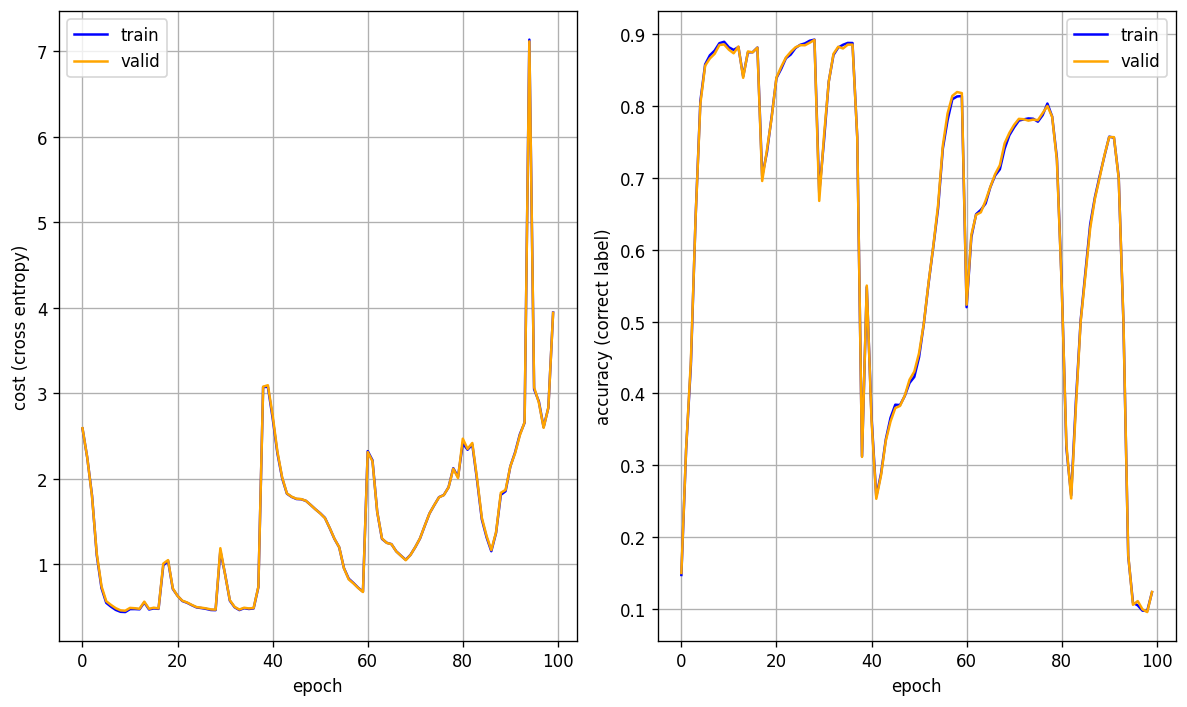

In [60]:
ann2.plot_fit_results()

## Predictions and model accuracy in test data ##

In [63]:
y_pred = ann2.predict(x_test, weights_path="weights.h5")

In [68]:
confusion_matrix(y_test, y_pred)

array([[ 952,    0,    2,    4,    1,   10,    9,    1,    1,    0],
       [   0, 1100,   12,    6,    1,    0,    6,    0,   10,    0],
       [  15,   15,  921,   21,   11,    4,   11,    9,   15,   10],
       [   9,    1,   24,  903,    2,   31,    3,    9,   12,   16],
       [   1,    0,    3,    2,  929,    1,   23,    5,    4,   14],
       [  30,    3,    9,   48,   22,  726,   18,    2,   25,    9],
       [  31,    3,    7,    0,   24,   17,  873,    1,    1,    1],
       [   4,   12,   29,   14,    8,    4,    2,  925,    0,   30],
       [   6,   12,   22,   18,   35,  109,   16,    7,  733,   16],
       [   7,    1,    1,   12,  112,   20,    7,   28,    6,  815]])

In [72]:
# Rough estimate of test accuracy

(y_test == y_pred).sum() / y_test.shape[0]

0.8877